In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Crop_Data.csv")
df.head()

,temperature,humidity,ph,water availability,harvest season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [3]:
df.rename(columns={'harvest season': 'harvest_season'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   harvest_season      1400 non-null   object 
 5   label               1400 non-null   object 
 6   Country             1400 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.7+ KB


## Exploratory Data Analysis

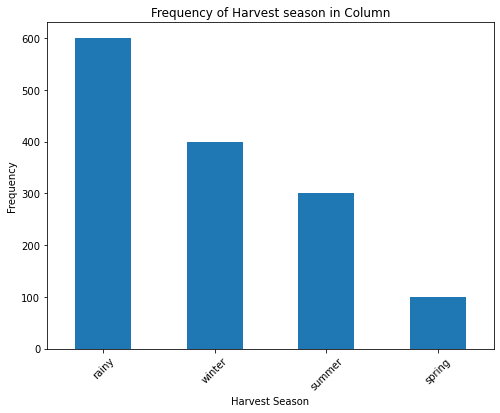

In [6]:
# Count the occurrences of each target variable
value_counts = df['harvest_season'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Frequency of Harvest season in Column')
plt.xlabel('Harvest Season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Mmore rainy season in the dataset, followed by winter, then sumer and spring.

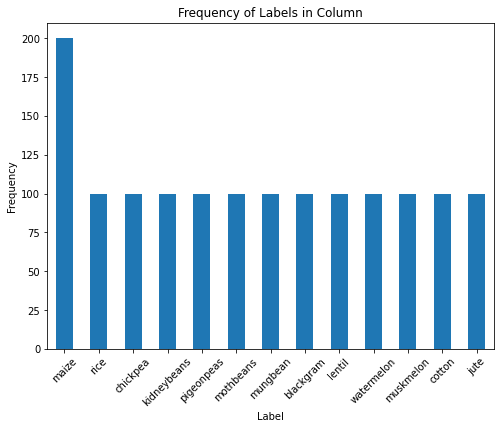

In [7]:
# Count the occurrences of label variable
value_counts = df['label'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Frequency of Labels in Column')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

there are more maize in the dataset, with the other label of the same count

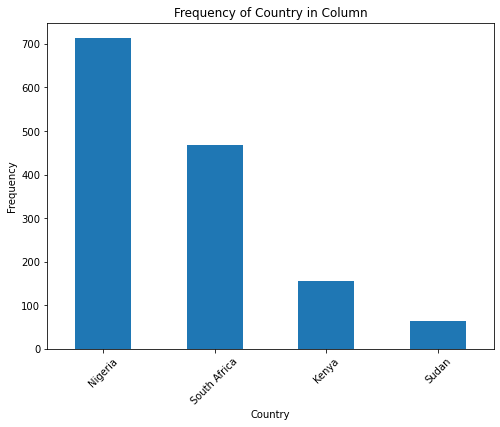

In [8]:
# Count the occurrences of each target variable
value_counts = df['Country'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Frequency of Country in Column')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Nigeria is the most country in the dataset followed with SA and kenya and sudan

In [7]:
#correlation

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'numerical_feature' is a numerical column and 'target_variable' is a categorical column
# 'data' is your DataFrame containing these columns

df.rename(columns={'harvest season': 'harvest_season'}, inplace=True)
# Fit a linear model (ANOVA) to measure the association between numerical_feature and target_variable
model = ols('temperature ~ C(harvest_season)', data=df).fit()

# Get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                         sum_sq      df           F        PR(>F)
C(harvest_season)   4860.057470     3.0  122.598447  1.756120e-70
Residual           18446.781399  1396.0         NaN           NaN


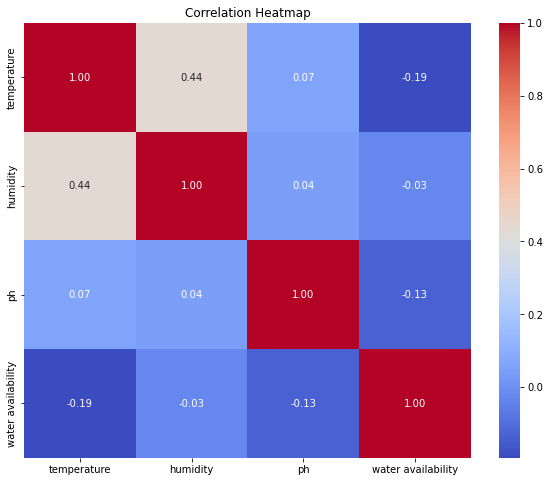

In [10]:
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing numerical columns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

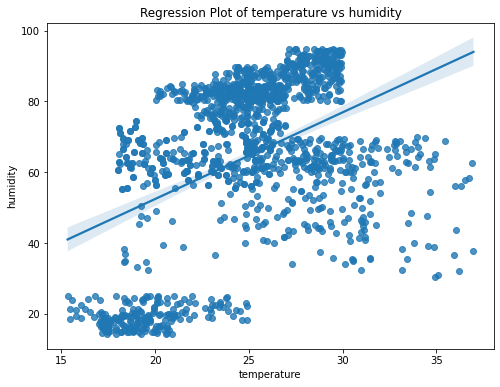

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(x='temperature', y='humidity', data=df)
plt.title('Regression Plot of temperature vs humidity')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

from the heat map it shows that Temperature and Humidity are really correlated. the rest not so much

#### Encode the categorical variables


In [12]:
label_encoder = LabelEncoder()
country_encoder = LabelEncoder()
season_encoder = LabelEncoder()

df['label'] = label_encoder.fit_transform(df['label'])
df['Country'] = country_encoder.fit_transform(df['Country'])
df['harvest_season'] = season_encoder.fit_transform(df['harvest_season'])


In [14]:
# Shuffle the DataFrame rows
shuffled_df = df.sample(frac=1, random_state=2023)
shuffled_df

,temperature,humidity,ph,water availability,harvest_season,label,Country
703,34.036792,67.211138,6.501869,73.235736,3,0,1
320,20.653758,23.105386,5.967533,67.717689,1,4,2
137,21.541562,59.640242,6.803932,109.751538,0,6,2
1161,29.827294,90.790073,6.400772,22.842036,2,9,1
191,18.093002,72.610242,6.376651,78.961595,0,6,2
...,...,...,...,...,...,...,...
884,25.712698,64.112333,7.692014,50.170678,0,5,1
515,25.609734,50.733007,5.877075,53.392495,2,7,1
695,28.727527,89.127604,7.069748,58.529743,0,8,0
454,24.807102,45.011100,5.023115,188.492864,0,10,1


In [15]:
# Scale numerical columns (temperature, humidity, pH, water availability)
scaler = MinMaxScaler()
columns_to_scale = ['temperature', 'humidity', 'ph', 'water availability']
shuffled_df[columns_to_scale] = scaler.fit_transform(shuffled_df[columns_to_scale])

In [17]:
X = shuffled_df.drop(['harvest_season'], axis=1)
y = shuffled_df['harvest_season']
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test)

# Assess the model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9142857142857143


In [19]:
from joblib import dump

dump(knn_classifier, 'knn_model.pkl')
dump(label_encoder, 'label_encoder.pkl')
dump(country_encoder, 'country_encoder.pkl')
dump(season_encoder, 'season_encoder.pkl')
dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']